In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')
from numba import jit
from time import time

In [2]:
# One iterator function that can be applied to calculate both
# the Mandelbrot and the Julia set.
# The nopython keyword to @jit ensures that numba gives
# an error if it cannot produce fast compiled code.
@jit(nopython = True)
def iterator(z, c, maxiter):
    for i in range(maxiter):
        z = z*z + c
        if abs(z) > 2:
            return i
    return maxiter

@jit(nopython = True)
def mandelbrot(Nx, Ny, xmin=-2, xmax=1, ymin=-1, ymax=1, maxiter=50):
    x = np.linspace(xmin, xmax, Nx)
    y = np.linspace(ymin, ymax, Ny)
    m = np.empty((Nx, Ny))
    for i in range(Nx):
        for j in range(Ny):
            m[i,j] = iterator(z = 0, c = x[i] + 1j*y[j], maxiter = maxiter)
    return x, y, m

@jit(nopython = True)
def julia(c, Nx, Ny, xmin=-2, xmax=1, ymin=-1, ymax=1, maxiter=50):
    x = np.linspace(xmin, xmax, Nx)
    y = np.linspace(ymin, ymax, Ny)
    m = np.empty((Nx, Ny))
    for i in range(Nx):
        for j in range(Ny):
            m[i,j] = iterator(z = x[i] + 1j*y[j], c = c, maxiter = maxiter)
    return x, y, m

# Task A - Plot overview of Mandelbrot set

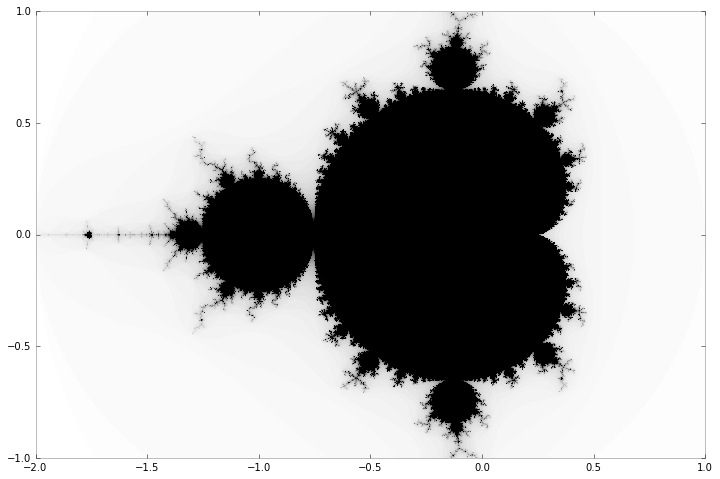

In [3]:
Nx = 1500
Ny = 1000
x, y, m = mandelbrot(Nx, Ny)
fig = plt.figure(figsize = (12, 8))
plt.pcolormesh(x, y, m.T, cmap = 'Greys')

## Task B - Plot Mandelbrot and Julia sets

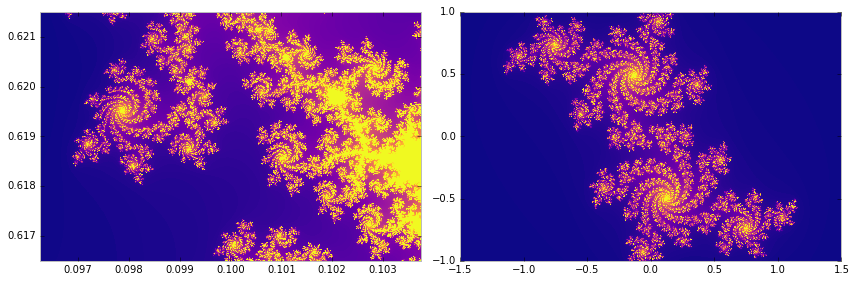

In [4]:
# Center of Mandelbrot plot / parameter of Julia plot
c = 0.1 + 0.619j
# Height and width of Mandelbrot plot
h = 0.005
w = 1.5*h
# Calculate frame limits
xmin = c.real - w/2
xmax = c.real + w/2
ymin = c.imag - h/2
ymax = c.imag + h/2
# Resolution in x direction
Nx   = 1500
# Calculate Ny to maintain 1:1 aspect ratio
Ny   = int(Nx*(ymax-ymin)/(xmax-xmin))

maxiter = 200
xm, ym, m = mandelbrot(Nx, Ny, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, maxiter=maxiter)
xj, yj, j = julia(c, Nx, Ny, xmin=-1.5, xmax=1.5, maxiter=maxiter)

# Plotting
fig, ax = plt.subplots(ncols = 2, figsize = (12,4))
ax[0].pcolormesh(xm, ym, m.T, cmap = 'plasma')
ax[0].set_xlim(np.amin(xm), np.amax(xm))
ax[0].set_ylim(np.amin(ym), np.amax(ym))

ax[1].pcolormesh(xj, yj, j.T, cmap = 'plasma')
ax[1].set_xlim(np.amin(xj), np.amax(xj))
ax[1].set_ylim(np.amin(yj), np.amax(yj))

plt.tight_layout()

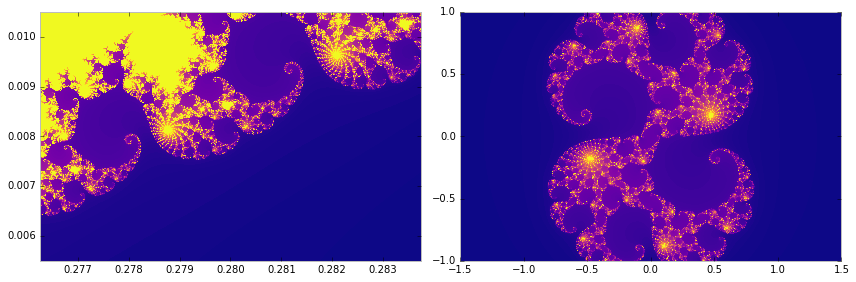

In [5]:
# Center of Mandelbrot plot / parameter of Julia plot
c = 0.28 + 0.008j
# Height and width of Mandelbrot plot
h = 0.005
w = 1.5*h
# Calculate frame limits
xmin = c.real - w/2
xmax = c.real + w/2
ymin = c.imag - h/2
ymax = c.imag + h/2
# Resolution in x direction
Nx   = 1500
# Calculate Ny to maintain 1:1 aspect ratio
Ny   = int(Nx*(ymax-ymin)/(xmax-xmin))

maxiter = 200
xm, ym, m = mandelbrot(Nx, Ny, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, maxiter=maxiter)
xj, yj, j = julia(c, Nx, Ny, xmin=-1.5, xmax=1.5, maxiter=maxiter)

# Plotting
fig, ax = plt.subplots(ncols = 2, figsize = (12,4))
ax[0].pcolormesh(xm, ym, m.T, cmap = 'plasma')
ax[0].set_xlim(np.amin(xm), np.amax(xm))
ax[0].set_ylim(np.amin(ym), np.amax(ym))

ax[1].pcolormesh(xj, yj, j.T, cmap = 'plasma')
ax[1].set_xlim(np.amin(xj), np.amax(xj))
ax[1].set_ylim(np.amin(yj), np.amax(yj))

plt.tight_layout()